# AIMS

pre processing portfolio dataset:

- rename id column.
- one hot encode for channel column.

pre processing profile dataset:

- check the age column for extreme values (118)
- create readable date format in became_member_on column
- extract its year, month and day from became_member_on column add to columns (for further analysis)
- create new column grouped with age group
- create new column grouped with salary group
- fillna with median values and change its datatype
- rename the id columns for ease of understanding
- create new column grouped with member_since group:

pre processing transcript dataset:

- rename the id columns for ease of understanding.
- Create new columns offer_id, amount and reward from value column.
- Replace null value with 0 to amount column.
- Drop value column.
- One hot encode for event column.

In [3]:
%load_ext autoreload
%autoreload 2

In [21]:
import pandas as pd
import json

import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [6]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

In [7]:
# Crear los de drive
G_raw, G_processed, G_interim, G_external, G_models, G_reports, G_reports_figures = direcciones('starbucks')

In [13]:
# json 
portfolio = pd.read_json(path.data_raw_dir('portfolio.json'), orient='records', lines=True)
# G_portfolio = pd.read_json(G_raw/'portfolio.json', orient='records', lines=True)
profile = pd.read_json(path.data_raw_dir('profile.json'), orient='records', lines=True)
# transcript = pd.read_json(path.data_raw_dir('transcript.json'), orient='records', lines=True)

## Portfolio dataset

In [9]:
# rename the id columns for ease of understanding:
portfolio.rename(columns = {'id': 'offer_id'}, inplace = True)

In [10]:
# One-hot encode : channels column:

portfolio['email'] = portfolio['channels'].apply(lambda ele: 1 if 'email' in ele else 0)
portfolio['web'] = portfolio['channels'].apply(lambda ele: 1 if 'web' in ele else 0)
portfolio['mobile'] = portfolio['channels'].apply(lambda ele: 1 if 'mobile' in ele else 0)
portfolio['social'] = portfolio['channels'].apply(lambda ele: 1 if 'social' in ele else 0)

In [ ]:
# save data
portfolio.to_csv(path.data_processed_dir("portfolio.csv"), index=False)
portfolio.to_csv(G_processed/"portfolio.csv", index=False)

## Profile dataset

In [14]:
# check the age column for extreme values (118) and replace it with 0:

profile['age'] = profile['age'].apply(lambda ele: 0 if ele == 118 else ele)

In [15]:
# fill median values to income

profile['income'].fillna((profile['income'].median()), inplace=True)

In [16]:
# change income datatype:

profile['income'] = profile['income'].astype('int')

In [17]:
# rename the id columns for ease of understanding:

profile.rename(columns = {'id': 'customer_id'}, inplace = True)

In [18]:
# create new column grouped with age group:

def Ages(ele):
        if ele < 20:
            return 1
        elif 21 < ele <= 30:
            return 2
        elif 31 <= ele <= 40:
            return 3
        elif 41 <= ele <= 50:
            return 4
        elif 51 <= ele <= 60:
            return 5
        elif 61 <= ele <= 70:
            return 6
        elif 71 <= ele <= 80:
            return 7
        elif 81 <= ele <= 90:
            return 8
        elif 91 <= ele <= 101:
            return 9
        else:
            return 10
            
profile['age_groups'] = profile['age'].apply(Ages)

In [19]:
# create new column grouped with salary group:

def Salarys(ele):
        if ele < 30000:
            return 1
        elif 30001 < ele <= 40000:
            return 2
        elif 40001 <= ele <= 50000:
            return 3
        elif 50001 <= ele <= 60000:
            return 4
        elif 60001 <= ele <= 70000:
            return 5
        elif 70001 <= ele <= 80000:
            return 6
        elif 80001 <= ele <= 90000:
            return 7
        elif 90001 <= ele <= 100000:
            return 8
        elif 100001 <= ele <= 110000:
            return 9
        elif 110001 <= ele <= 120000:
            return 10
        elif 120001 <= ele <= 150000:
            return 10
        else:
            return 0
            
profile['salary_groups'] = profile['income'].apply(Salarys)

In [20]:
# extract its year, month and day from became_member_on column add to columns (for further analysis):

profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile['member_year'] = profile['became_member_on'].dt.year
profile['member_month'] = profile['became_member_on'].dt.month
profile['member_day'] = profile['became_member_on'].dt.day

In [22]:
# create readable date format in became_member_on column:

profile['members_since_in_days'] = datetime.datetime.today().date() - profile['became_member_on'].dt.date
profile['members_since_in_days'] = profile['members_since_in_days'].dt.days

In [23]:
# create new column grouped with member_since group:

def Year(ele):
    if 744 <= ele <= 3*365:
        return 2
    elif 3*365 <= ele <= 4*365:
        return 3
    elif 4*365 <= ele <= 5*365:
        return 4
    elif 5*365 <= ele <= 6*365:
        return 5
    elif 6*365 <= ele <= 7*365:
        return 6
    elif 7*365 <= ele <= 8*365:
        return 7
    elif 8*365 <= ele <= 9*365:
        return 8
    else:
        return 0
            
profile['member_since_year'] = profile['members_since_in_days'].apply(Year)

In [25]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   gender                 14825 non-null  object        
 1   age                    17000 non-null  int64         
 2   customer_id            17000 non-null  object        
 3   became_member_on       17000 non-null  datetime64[ns]
 4   income                 17000 non-null  int32         
 5   age_groups             17000 non-null  int64         
 6   salary_groups          17000 non-null  int64         
 7   member_year            17000 non-null  int64         
 8   member_month           17000 non-null  int64         
 9   member_day             17000 non-null  int64         
 10  members_since_in_days  17000 non-null  int64         
 11  member_since_year      17000 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(8), object(2)
memory u

In [26]:
# Remove null values:

profile.dropna(inplace = True)

In [27]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   gender                 14825 non-null  object        
 1   age                    14825 non-null  int64         
 2   customer_id            14825 non-null  object        
 3   became_member_on       14825 non-null  datetime64[ns]
 4   income                 14825 non-null  int32         
 5   age_groups             14825 non-null  int64         
 6   salary_groups          14825 non-null  int64         
 7   member_year            14825 non-null  int64         
 8   member_month           14825 non-null  int64         
 9   member_day             14825 non-null  int64         
 10  members_since_in_days  14825 non-null  int64         
 11  member_since_year      14825 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(8), object(2)
memory u

In [28]:
profile.head()

,gender,age,customer_id,became_member_on,income,age_groups,salary_groups,member_year,member_month,member_day,members_since_in_days,member_since_year
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000,5,10,2017,7,15,1904,5
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000,7,8,2017,5,9,1971,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000,6,5,2018,4,26,1619,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000,6,4,2018,2,9,1695,4
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000,5,4,2017,11,11,1785,4


In [29]:
# save data
profile.to_csv(path.data_processed_dir("profile.csv"), index=False)
profile.to_csv(G_processed/"profile.csv", index=False)

## Transcript dataset

In [30]:
# rename the id columns for ease of understanding:

transcript.rename(columns = {'person': 'customer_id'}, inplace = True)

In [31]:
# Create new columns offer_id, amount and reward from value column:

import ast

for ele in transcript['value']:
    try:
        ele['offer_id'] = ele.pop('offer id')
    except:
        pass

# Create separate columns for amount and offer_id and reward from value col dictionary:
data = pd.DataFrame([ast.literal_eval(json.dumps(ele)) for ele in transcript.value.values])

transcript = pd.concat([transcript, data], axis = 1)

In [32]:
# Replace null value with 0 to amount column:

transcript.amount = transcript.amount.replace({np.nan: 0})

In [33]:
#  Drop value column:

transcript.drop('value', axis = 1, inplace = True)

In [34]:
# one hot encode for event column:

df = pd.get_dummies(transcript['event'])

transcript = pd.concat([df, transcript], axis = 1, sort = False)

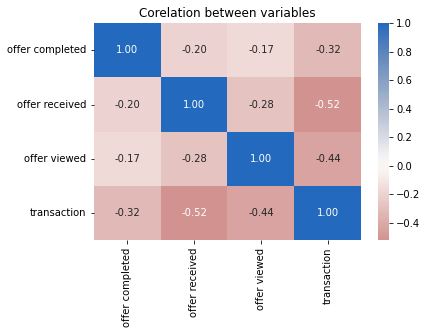

In [35]:
# Heatmap for events:

sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Corelation between variables');

There is no relationship between types of events. negative corelation between them.

In [36]:
# Rename column names:

transcript.rename(columns = {'offer completed': 'offer_completed', 
                             'offer received': 'offer_recived', 
                             'offer viewed': 'offer_viewed'}, inplace = True)

In [37]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   offer_completed  306534 non-null  uint8  
 1   offer_recived    306534 non-null  uint8  
 2   offer_viewed     306534 non-null  uint8  
 3   transaction      306534 non-null  uint8  
 4   customer_id      306534 non-null  object 
 5   event            306534 non-null  object 
 6   time             306534 non-null  int64  
 7   offer_id         167581 non-null  object 
 8   amount           306534 non-null  float64
 9   reward           33579 non-null   float64
dtypes: float64(2), int64(1), object(3), uint8(4)
memory usage: 15.2+ MB


In [38]:
transcript.head()

,offer_completed,offer_recived,offer_viewed,transaction,customer_id,event,time,offer_id,amount,reward
0,0,1,0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,NaN
1,0,1,0,0,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,NaN
2,0,1,0,0,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,NaN
3,0,1,0,0,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,NaN
4,0,1,0,0,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,NaN


In [39]:
# save data
transcript.to_csv(path.data_processed_dir("transcript.csv"), index=False)
transcript.to_csv(G_processed/"transcript.csv", index=False)